 # **Ground State Energy Estimation Of Hydrogen Atom**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def trial_wavefunction(r, alpha):
    return alpha * r * np.exp(-alpha * r)

def energy(r, alpha):
    E = (-alpha / 2) * (alpha - 2 / r) - 1 / r**1.1 
    return E



In [3]:
def metropolis(samples, alpha, step_size=1.0):
    sampled_r = np.zeros(samples)
    current_r = 0.1  
    
    for i in range(samples):
        new_r = current_r + np.random.uniform(-step_size, step_size)
        
        if new_r <= 0:
            sampled_r[i] = current_r
            continue
        
        acceptance_ratio = (trial_wavefunction(new_r, alpha)**2 
                            / trial_wavefunction(current_r, alpha)**2)
        
        if np.random.rand() < acceptance_ratio:
            current_r = new_r
        
        sampled_r[i] = current_r
    
    return sampled_r


In [4]:

def variational_monte(samples, alpha, step_size=4.0):
    radii = metropolis(samples, alpha, step_size)
    energies = energy(radii[samples // 2:], alpha)
    return np.mean(energies),np.var(energies)




In [5]:
# Run the VMC simulation for the harmonic oscillator
samples = int(1e5)
alphas = np.linspace(0.5, 1.5, 11)
step_range = 4.0

energies = []
variances = []

for alpha in alphas:
    mean_energy,variance= variational_monte(samples, alpha, step_range)
    energies.append(mean_energy)
    variances.append(variance)
    


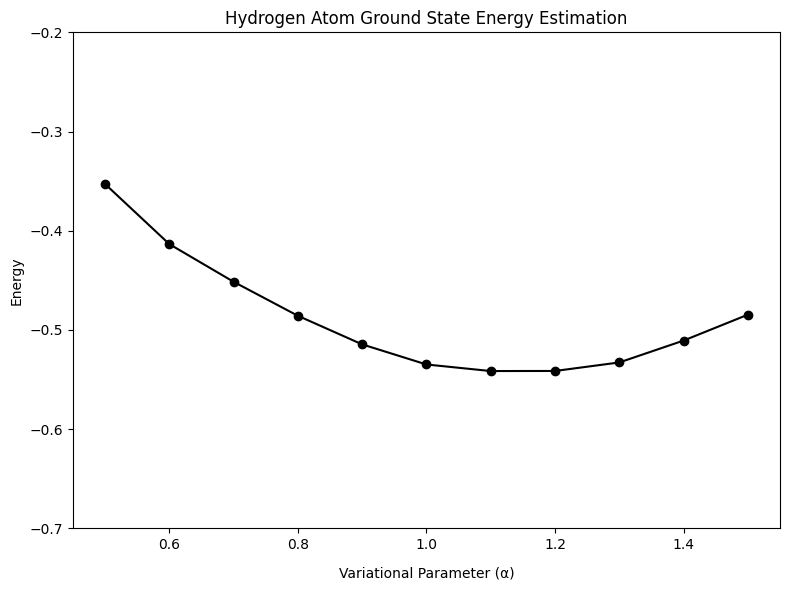

<Figure size 640x480 with 0 Axes>

In [18]:

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(alphas, energies, color='black', marker='o')
plt.title('Hydrogen Atom Ground State Energy Estimation')
plt.xlabel('Variational Parameter (α)', labelpad=10)
plt.ylabel('Energy')
plt.ylim(-0.7, -0.2)
plt.tight_layout()
plt.show()
plt.savefig("plothooo.png")

In [10]:
matrix=np.zeros((len(alphas),3))
for i in range(len(alphas)):
        matrix[i,0]=alphas[i]
for i in range(len(alphas)):
        matrix[i,1]=energies[i]
for i in range(len(alphas)):
        matrix[i,2]=variances[i]


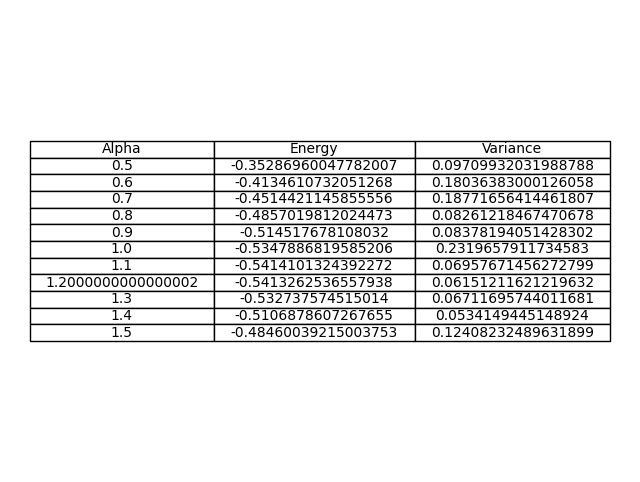

<Figure size 640x480 with 0 Axes>

In [17]:
# Data array (numerical values)# Header row (alphabets)
header = ["Alpha", "Energy", "Variance"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(cellText=matrix, 
                 colLabels=header, 
                 loc='center', 
                 cellLoc='center')

# Adjust font size and layout
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])

# Show table
plt.show()
plt.savefig("plothogu.png")